<a href="https://colab.research.google.com/github/nestrada79/MSDA/blob/main/D208/D208_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Research Question

## A. Purpose of Data Analysis

### 1. Research Question Relevance

How do various patient demographics and medical factors (like age, gender, BMI, etc.) affect the total medical charges incurred by the patient?

This question seeks to understand the determinants of medical costs, which is of great significance to healthcare providers, insurance companies, and patients.


### 2. Goals of Data Analysis

- To identify the significant predictors of medical charges.
- To quantify the relationship between these predictors and medical charges.
- To develop a predictive model that can be used to forecast medical charges based on specific patient demographics and attributes.


---



# Part II: Method Justification


## B. Multiple Linear Regression Methods

### 1. Assumptions of Multiple Linear Regression

- Linearity: The relationship between the dependent and independent variables is linear.
- Independence: Observations are independent of each other.
- Homoscedasticity: The variance of the residuals (errors) is constant across all levels of the independent variables.
-
Normality of Residuals: The residuals (or errors) of the model are normally distributed.


### 2. Benefits of Python or R
- Outline two advantages of utilizing Python or R during various stages of the analysis.


### 3. Suitability of Multiple Linear Regression
The research question aims to understand the relationship between a continuous dependent variable (medical charges) and multiple independent variables (patient demographics and medical attributes). Multiple linear regression is designed to handle such scenarios where we want to predict a continuous outcome variable based on multiple predictors.


---

# Part III: Data Preparation

## C. Data Preparation Process



### 1. Data Cleaning Goals and Steps
Goals:
- Identify and handle missing values.
- Check for duplicates and remove if any.
- Ensure data types are appropriate for each column.
- Remove any irrelevant columns that do not contribute to the research question.


In [ ]:
#Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### Load data


In [ ]:
#Load dataset into pandas dataframe
#Reloading dataframe at this point to make the cleaning process easier to roll back without having to rerun any previous analysis
medical_data = pd.read_csv('/content/medical_clean.csv')

In [ ]:
#Visually inspecting the first 10 rows
medical_data.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
5,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,...,2636.691180,12742.589910,4,5,4,4,3,5,4,6
6,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,...,3694.627161,16815.513600,4,3,3,2,3,4,5,5
7,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,...,3021.499039,6930.572138,1,2,2,5,4,2,4,2
8,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,...,2968.402860,8363.187290,3,3,2,3,3,3,4,2
9,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40325,-94.71424,...,3147.855813,26225.989910,5,5,5,3,4,2,3,2


#### Data Cleaning Steps

In [ ]:
# 1. Check for missing values
missing_values = medical_data.isnull().sum()
missing_values

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [ ]:
# 2. Check for duplicates
duplicate_rows = medical_data.duplicated().sum()
duplicate_rows

0

In [ ]:
# 3. Check data types of columns
data_types = medical_data.dtypes
data_types

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

<ipython-input-37-e0355a441763>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_original = medical_data.corr()


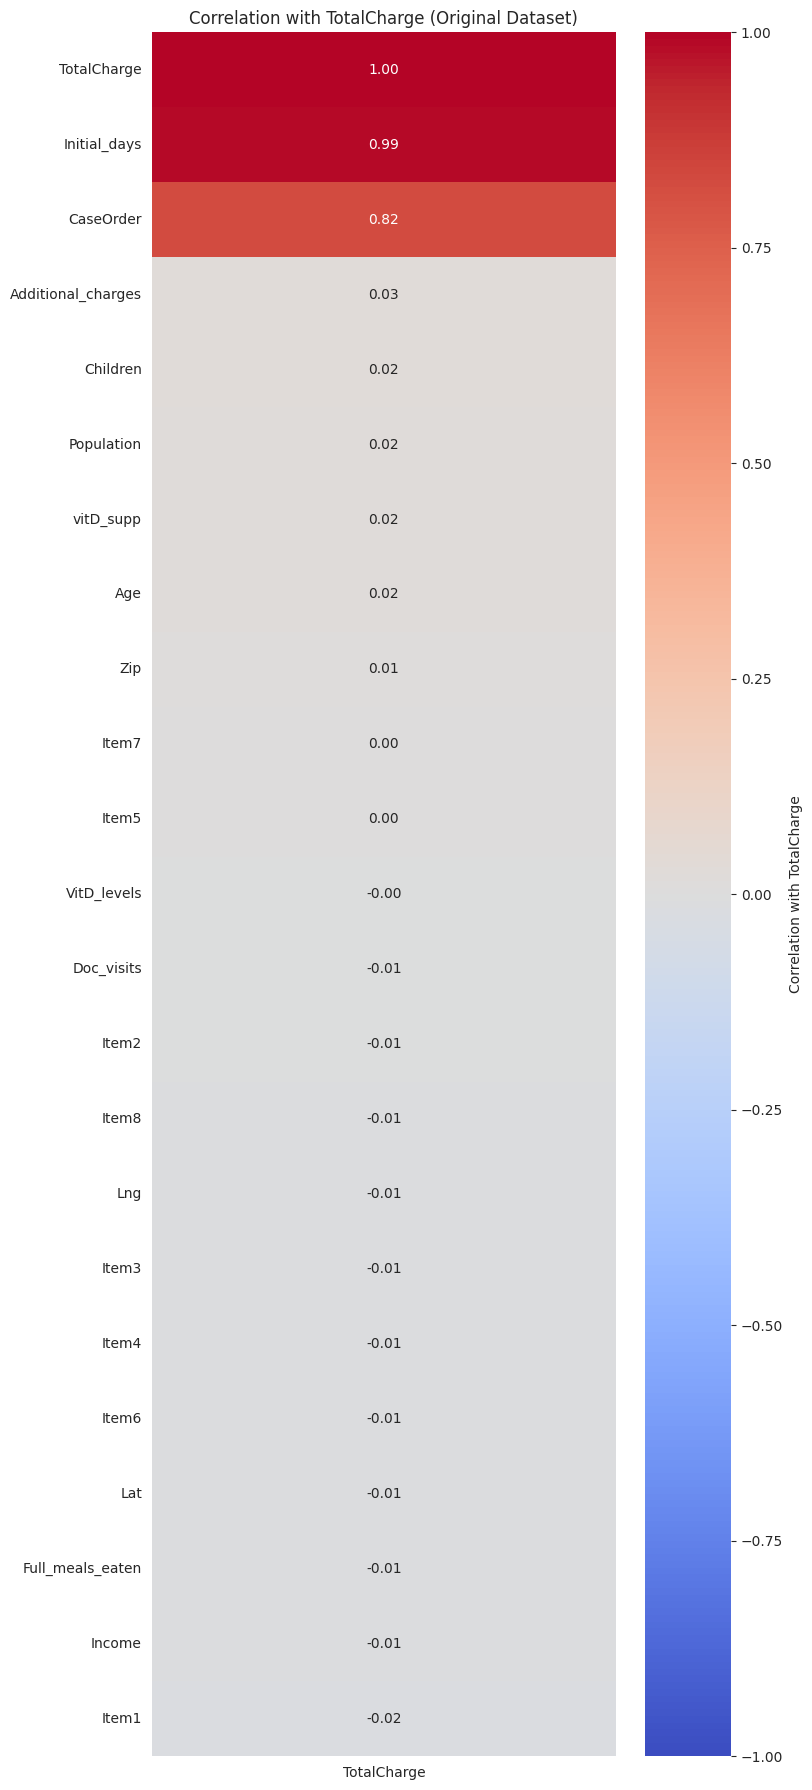

In [ ]:
# Compute the correlation matrix for the original dataset
correlation_matrix_original = medical_data.corr()

# Extract correlations of all features with 'TotalCharge' from the original dataset
total_charge_correlations_original = correlation_matrix_original['TotalCharge'].sort_values(ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(8, 18))

# Generate a focused heatmap for the original dataset
sns.heatmap(total_charge_correlations_original.to_frame(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation with TotalCharge'})

# Adjust layout for better visualization
plt.title("Correlation with TotalCharge (Original Dataset)")
plt.tight_layout()
plt.show()



- There are no missing values in the dataset.
- There are no duplicate rows in the dataset.
- The data types seem appropriate for each column, with a mix of numerical (int64 and float64) and categorical (object) data types.<P>
<br>

There are a few columns that are not relevant to the research question so they will need to be dropped. These include **CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, TimeZone**, and **Job**

I also will removed **Additional_charges** since this information is already included inside TotalCharge so it is already known there will be a relationship between higher additional charges and the total charge.

**Item1,	Item2,	Item3, Item4,	Item5,	Item6,	Item7** and	**Item8** will also be removed because they are not needed. These are survey items that related to patient satisfaction and logically do not have the ability to affect total charges. While there might be some correlation between patient satisfaction scores and total charges these survey scores do not have the ability to affect the amount a patient is charged.

At this stage I believe I should drop "Initial_days" as I believe because it's so positively correlated

In [ ]:
# Dropping irrelevant columns
columns_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
                   'Zip', 'Lat', 'Lng', 'TimeZone', 'Job','Additional_charges','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']

medical_data_cleaned = medical_data.drop(columns=columns_to_drop)


NameError: ignored

In [ ]:

# Display the first few rows of the cleaned dataset
medical_data_cleaned.head()

,Population,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge
0,2951,Suburban,1,53,86575.93,Divorced,Male,No,19.141466,6,...,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860
1,11303,Urban,3,51,46805.99,Married,Female,No,18.940352,4,...,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458
2,17125,Suburban,3,53,14370.14,Widowed,Female,No,18.057507,4,...,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222
3,2162,Suburban,0,78,39741.49,Married,Male,No,16.576858,4,...,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423
4,5287,Rural,1,22,1209.56,Widowed,Female,No,17.439069,5,...,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274


### 2. Variables' Summary Statistics
- Present a detailed summary of the dependent and independent variables. Include a snapshot of the output.

In [ ]:
summary_statistics = medical_data_cleaned.describe(include='all')
summary_statistics

,Population,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge
count,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000.000000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000
unique,NaN,3,NaN,NaN,NaN,5,3,2,NaN,NaN,...,2,2,2,2,2,2,2,4,NaN,NaN
top,NaN,Rural,NaN,NaN,NaN,Widowed,Female,No,NaN,NaN,...,No,No,No,No,No,No,No,Blood Work,NaN,NaN
freq,NaN,3369,NaN,NaN,NaN,2045,5018,6331,NaN,NaN,...,7262,6628,5886,6785,6059,5865,7107,5265,NaN,NaN
mean,9965.253800,NaN,2.097200,53.511700,40490.495160,NaN,NaN,NaN,17.964262,5.012200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.455299,5312.172769
std,14824.758614,NaN,2.163659,20.638538,28521.153293,NaN,NaN,NaN,2.017231,1.045734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.309341,2180.393838
min,0.000000,NaN,0.000000,18.000000,154.080000,NaN,NaN,NaN,9.806483,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001981,1938.312067
25%,694.750000,NaN,0.000000,36.000000,19598.775000,NaN,NaN,NaN,16.626439,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.896215,3179.374015
50%,2769.000000,NaN,1.000000,53.000000,33768.420000,NaN,NaN,NaN,17.951122,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.836244,5213.952000
75%,13945.000000,NaN,3.000000,71.000000,54296.402500,NaN,NaN,NaN,19.347963,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.161020,7459.699750


**Summary of Descriptive Statistics:**

**Numerical Variables:**
1. **Population**: The data spans a wide range of populations, from uninhabited areas (population of 0) to densely populated ones (up to 122,814). The mean is 9965.
2. **Children**: Most patients have between 0 and 10 children, which is a typical range. The mean is 2 (rounded to the nearest integer)
3. **Age**: The patients' ages in the dataset range from young adults (18 years) to seniors (89 years). The mean is 53.5
4. **Income**: There's a broad range of incomes, from a low of 154.08 to a high of 207,249.10. This diversity can provide insights into the economic backgrounds of patients. The mean is 40,490.50
5. **VitD_levels**: Vitamin D levels vary among patients, with the dataset capturing a range that might include both deficient and sufficient levels.
6. **Doc_visits**: Patients typically visit doctors between 1 to 9 times, indicating varying healthcare needs or health statuses.
7. **TotalCharge**: The total medical charges incurred by patients have a mean of approximately 5312.17, with charges ranging from 1938.31 to 9180.73.

**Categorical Variables:**
1. **Area**: The dataset includes three types of areas where patients reside: Rural, Urban, and Suburban. The most frequent is 'Rural'.
2. **Marital**: There are five unique categories for marital status, revealing diverse family structures.
3. **Gender**: The data has three gender categories, suggesting a more inclusive categorization beyond just Male and Female.
4. **Services**: Four distinct services are mentioned, with 'Blood Work' being the most common service availed by patients.

### 3. Data Visualizations
- Showcase univariate and bivariate visualizations for the dependent and independent variables.

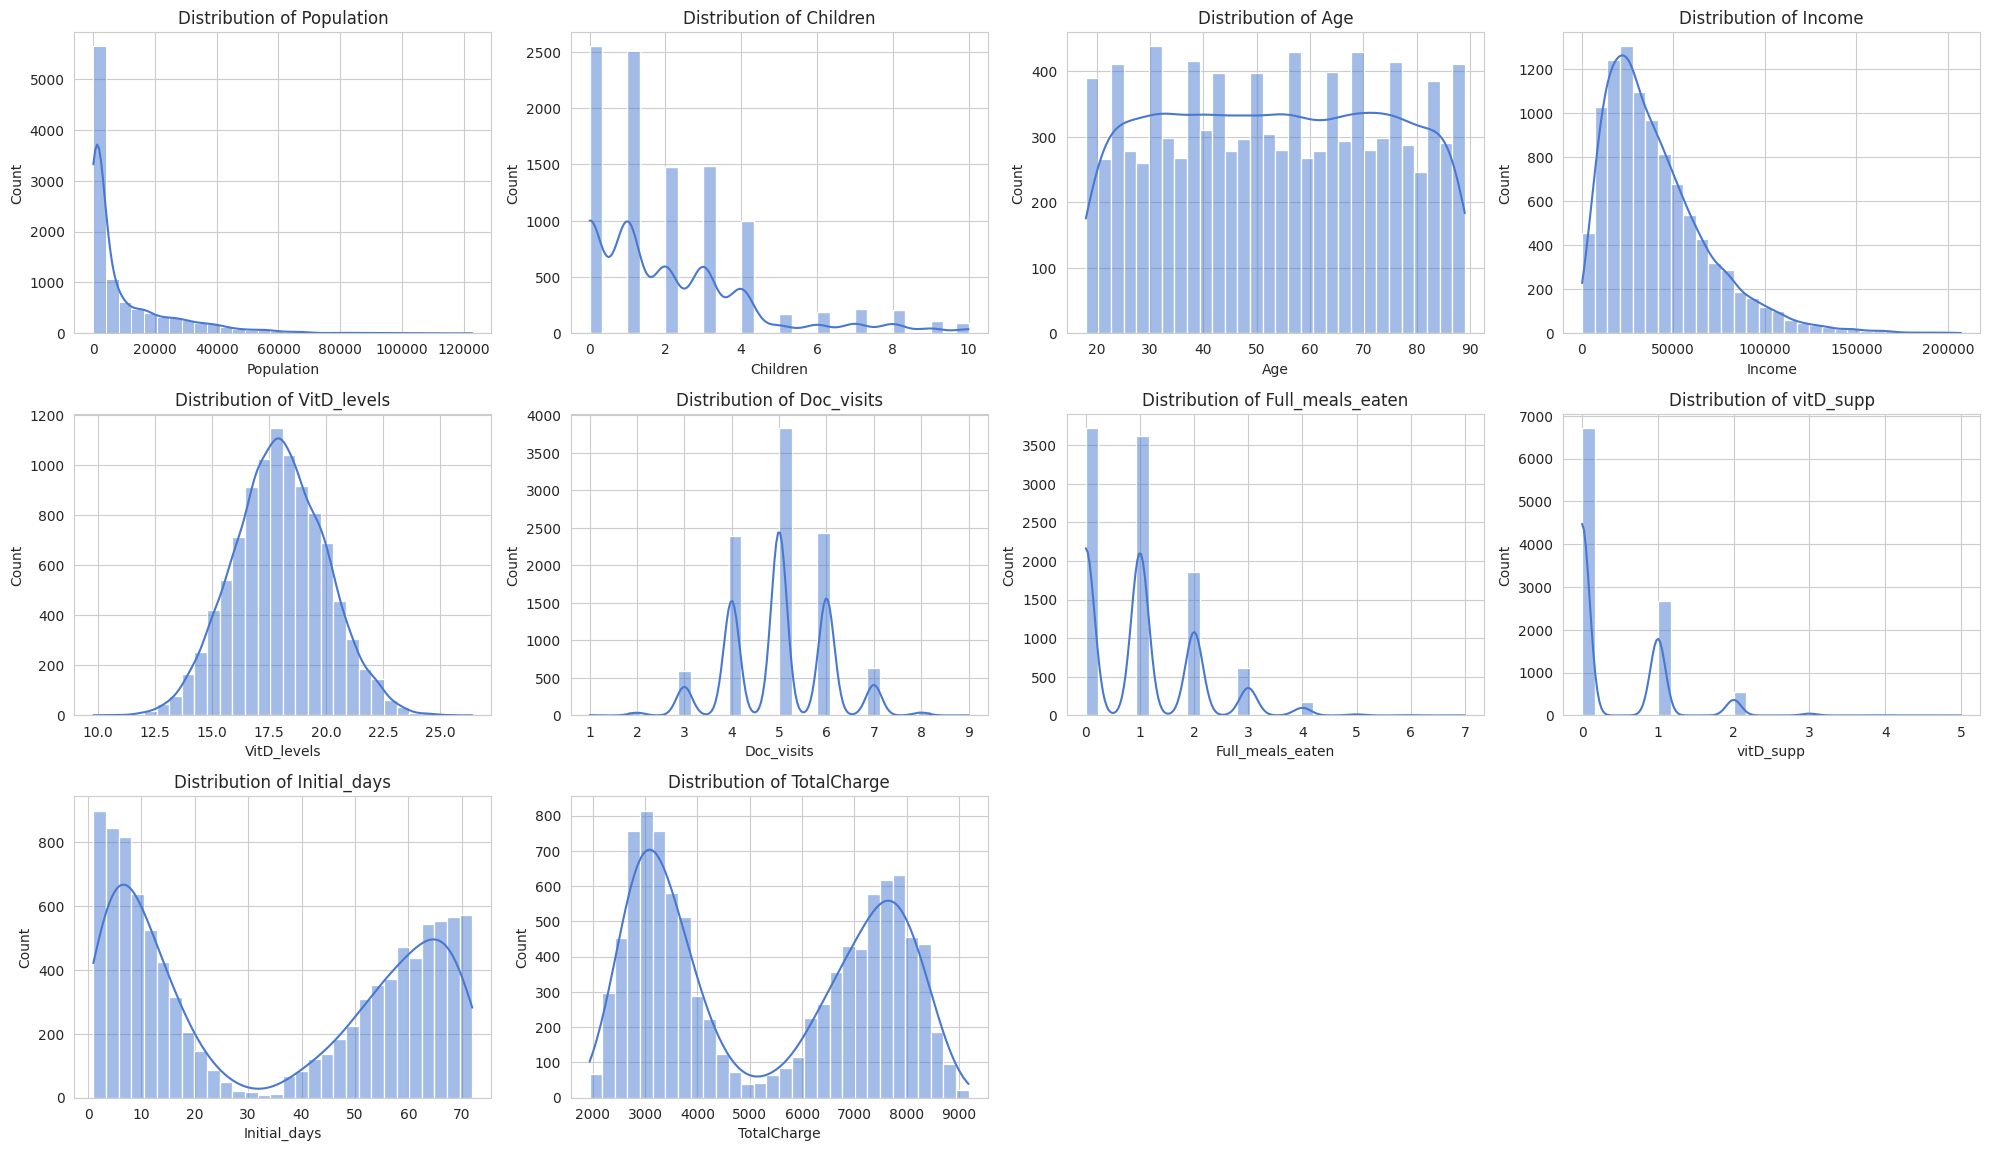

In [ ]:
# List of numerical variables
numerical_variables = medical_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plotting histograms for each numerical variable
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(4, 4, i)
    sns.histplot(medical_data_cleaned[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plt.show()

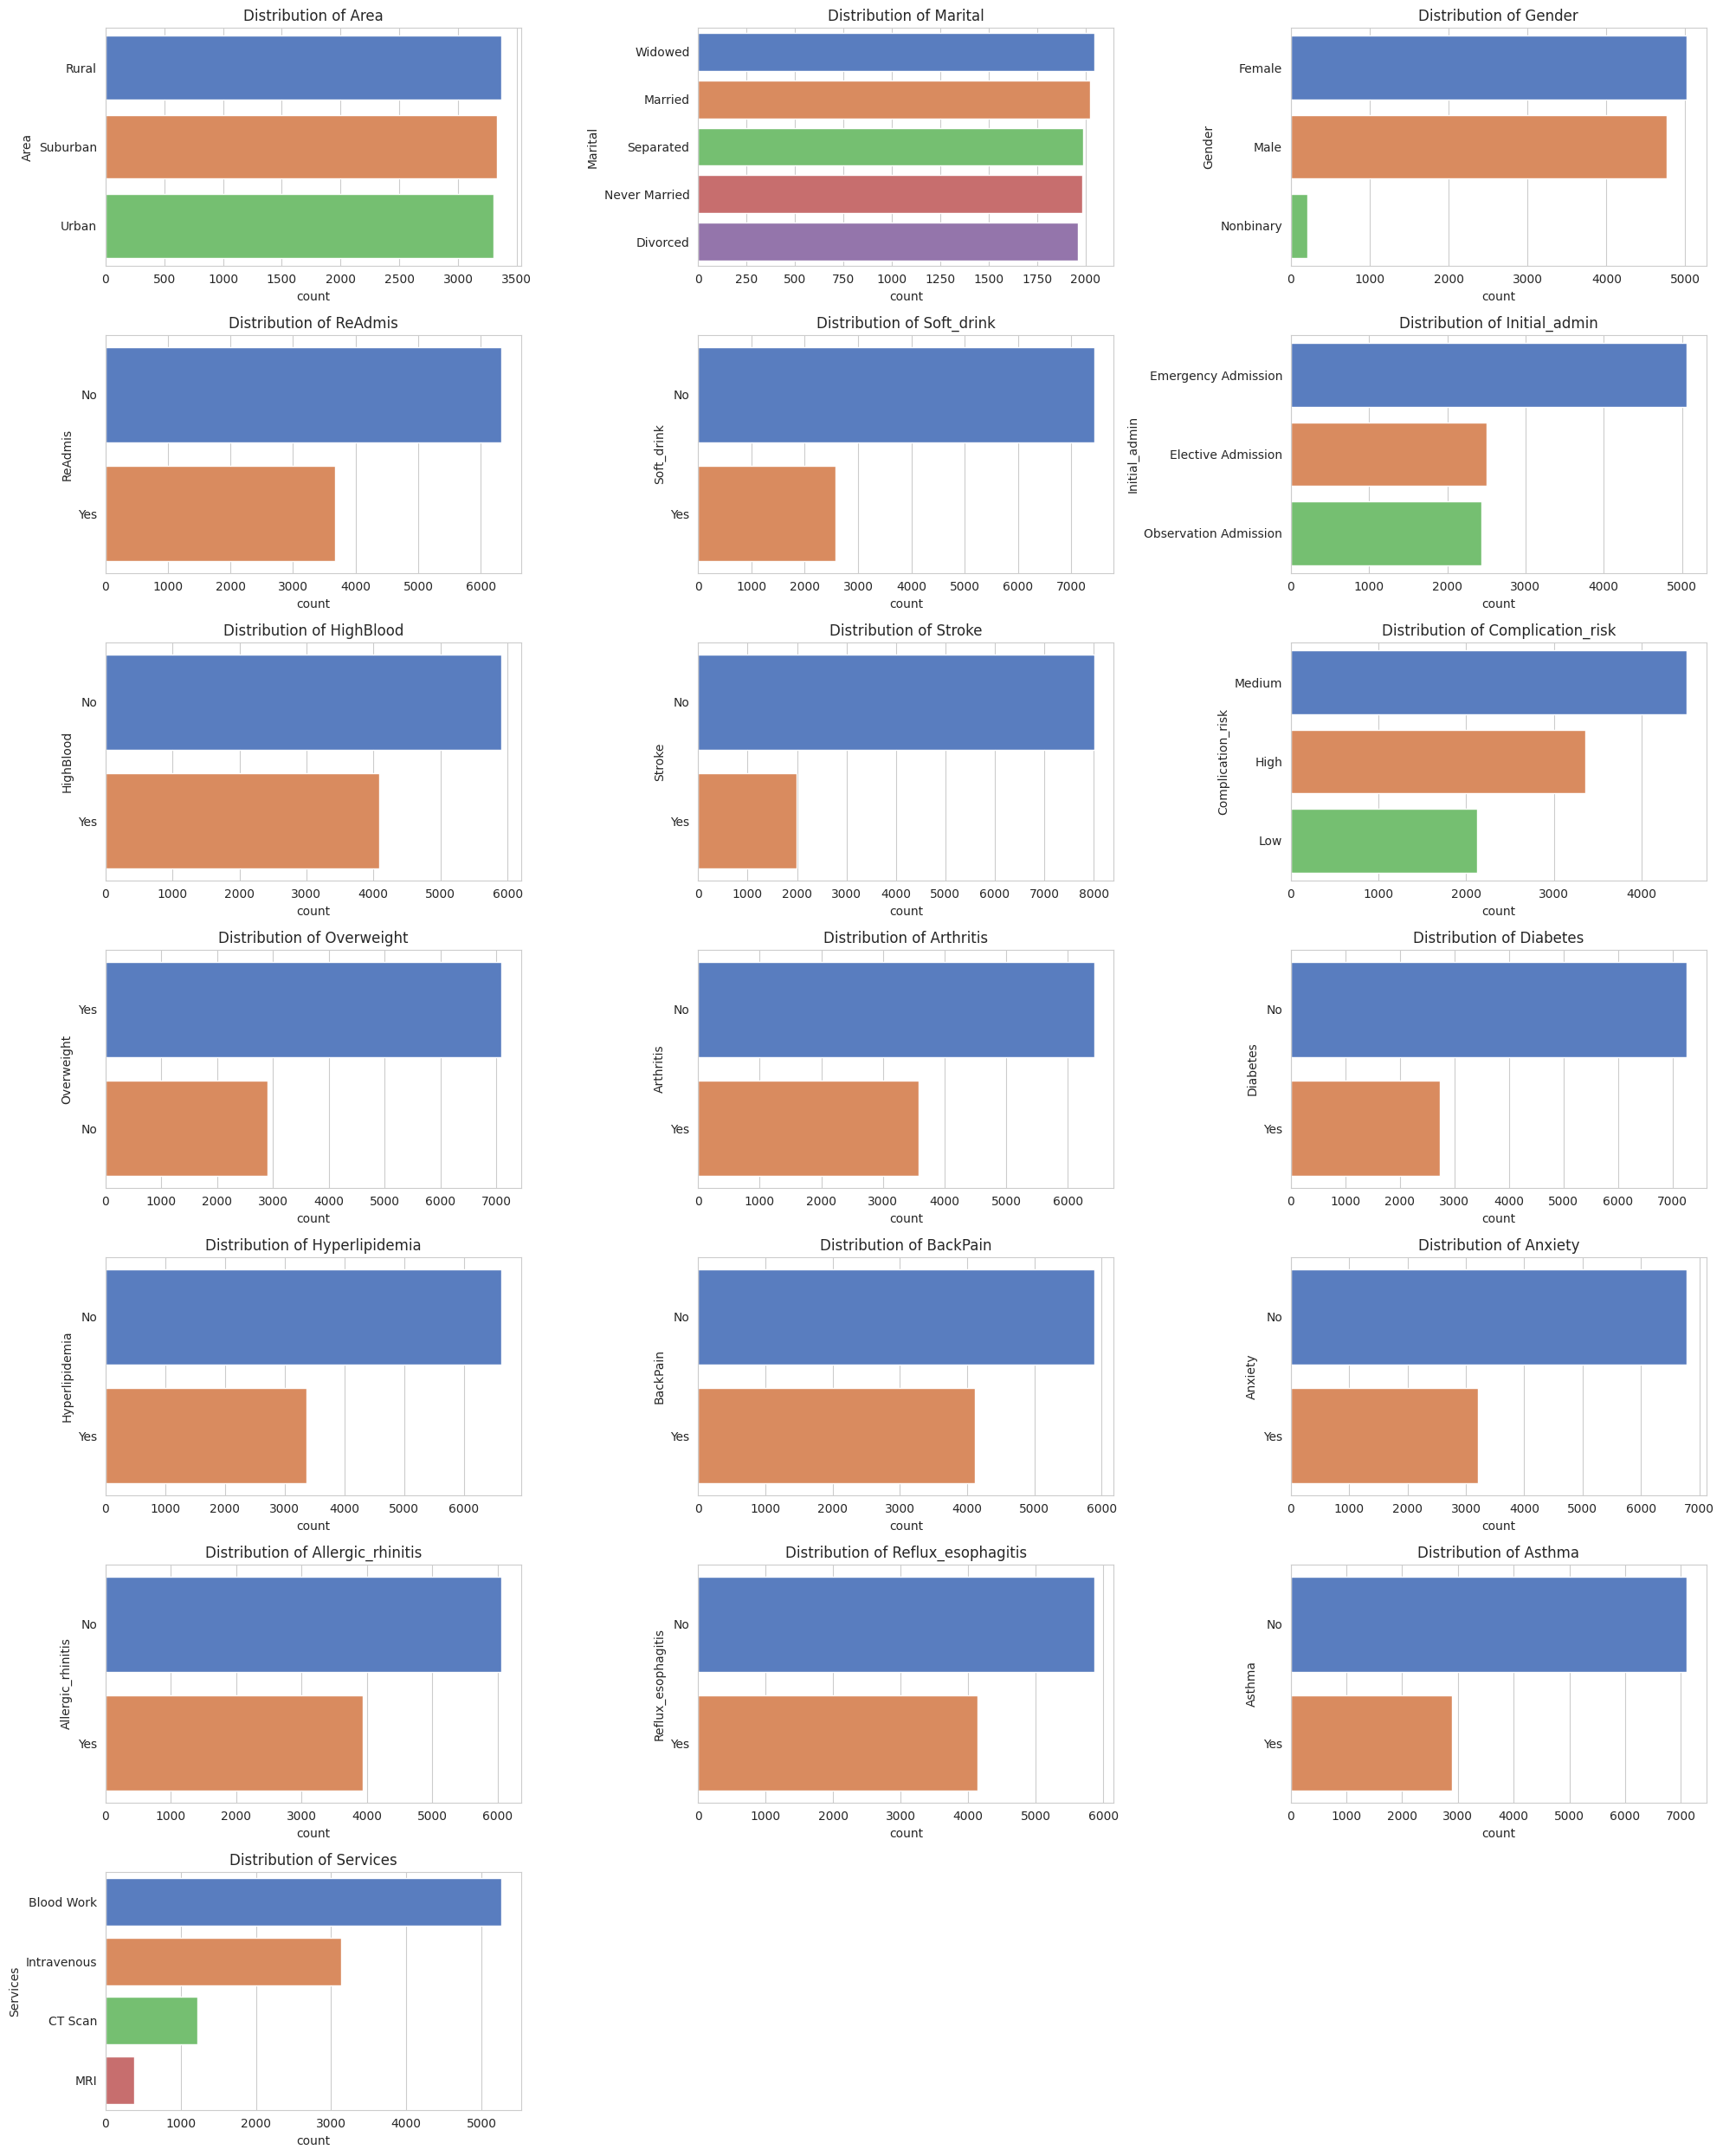

In [ ]:
# List of categorical variables
categorical_variables = medical_data_cleaned.select_dtypes(include=['object']).columns

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Create a figure to accommodate all categorical variables
plt.figure(figsize=(20, 25))

# Plotting bar plots for each categorical variable
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(7, 3, i)
    sns.countplot(y=medical_data_cleaned[var], order=medical_data_cleaned[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plt.show()

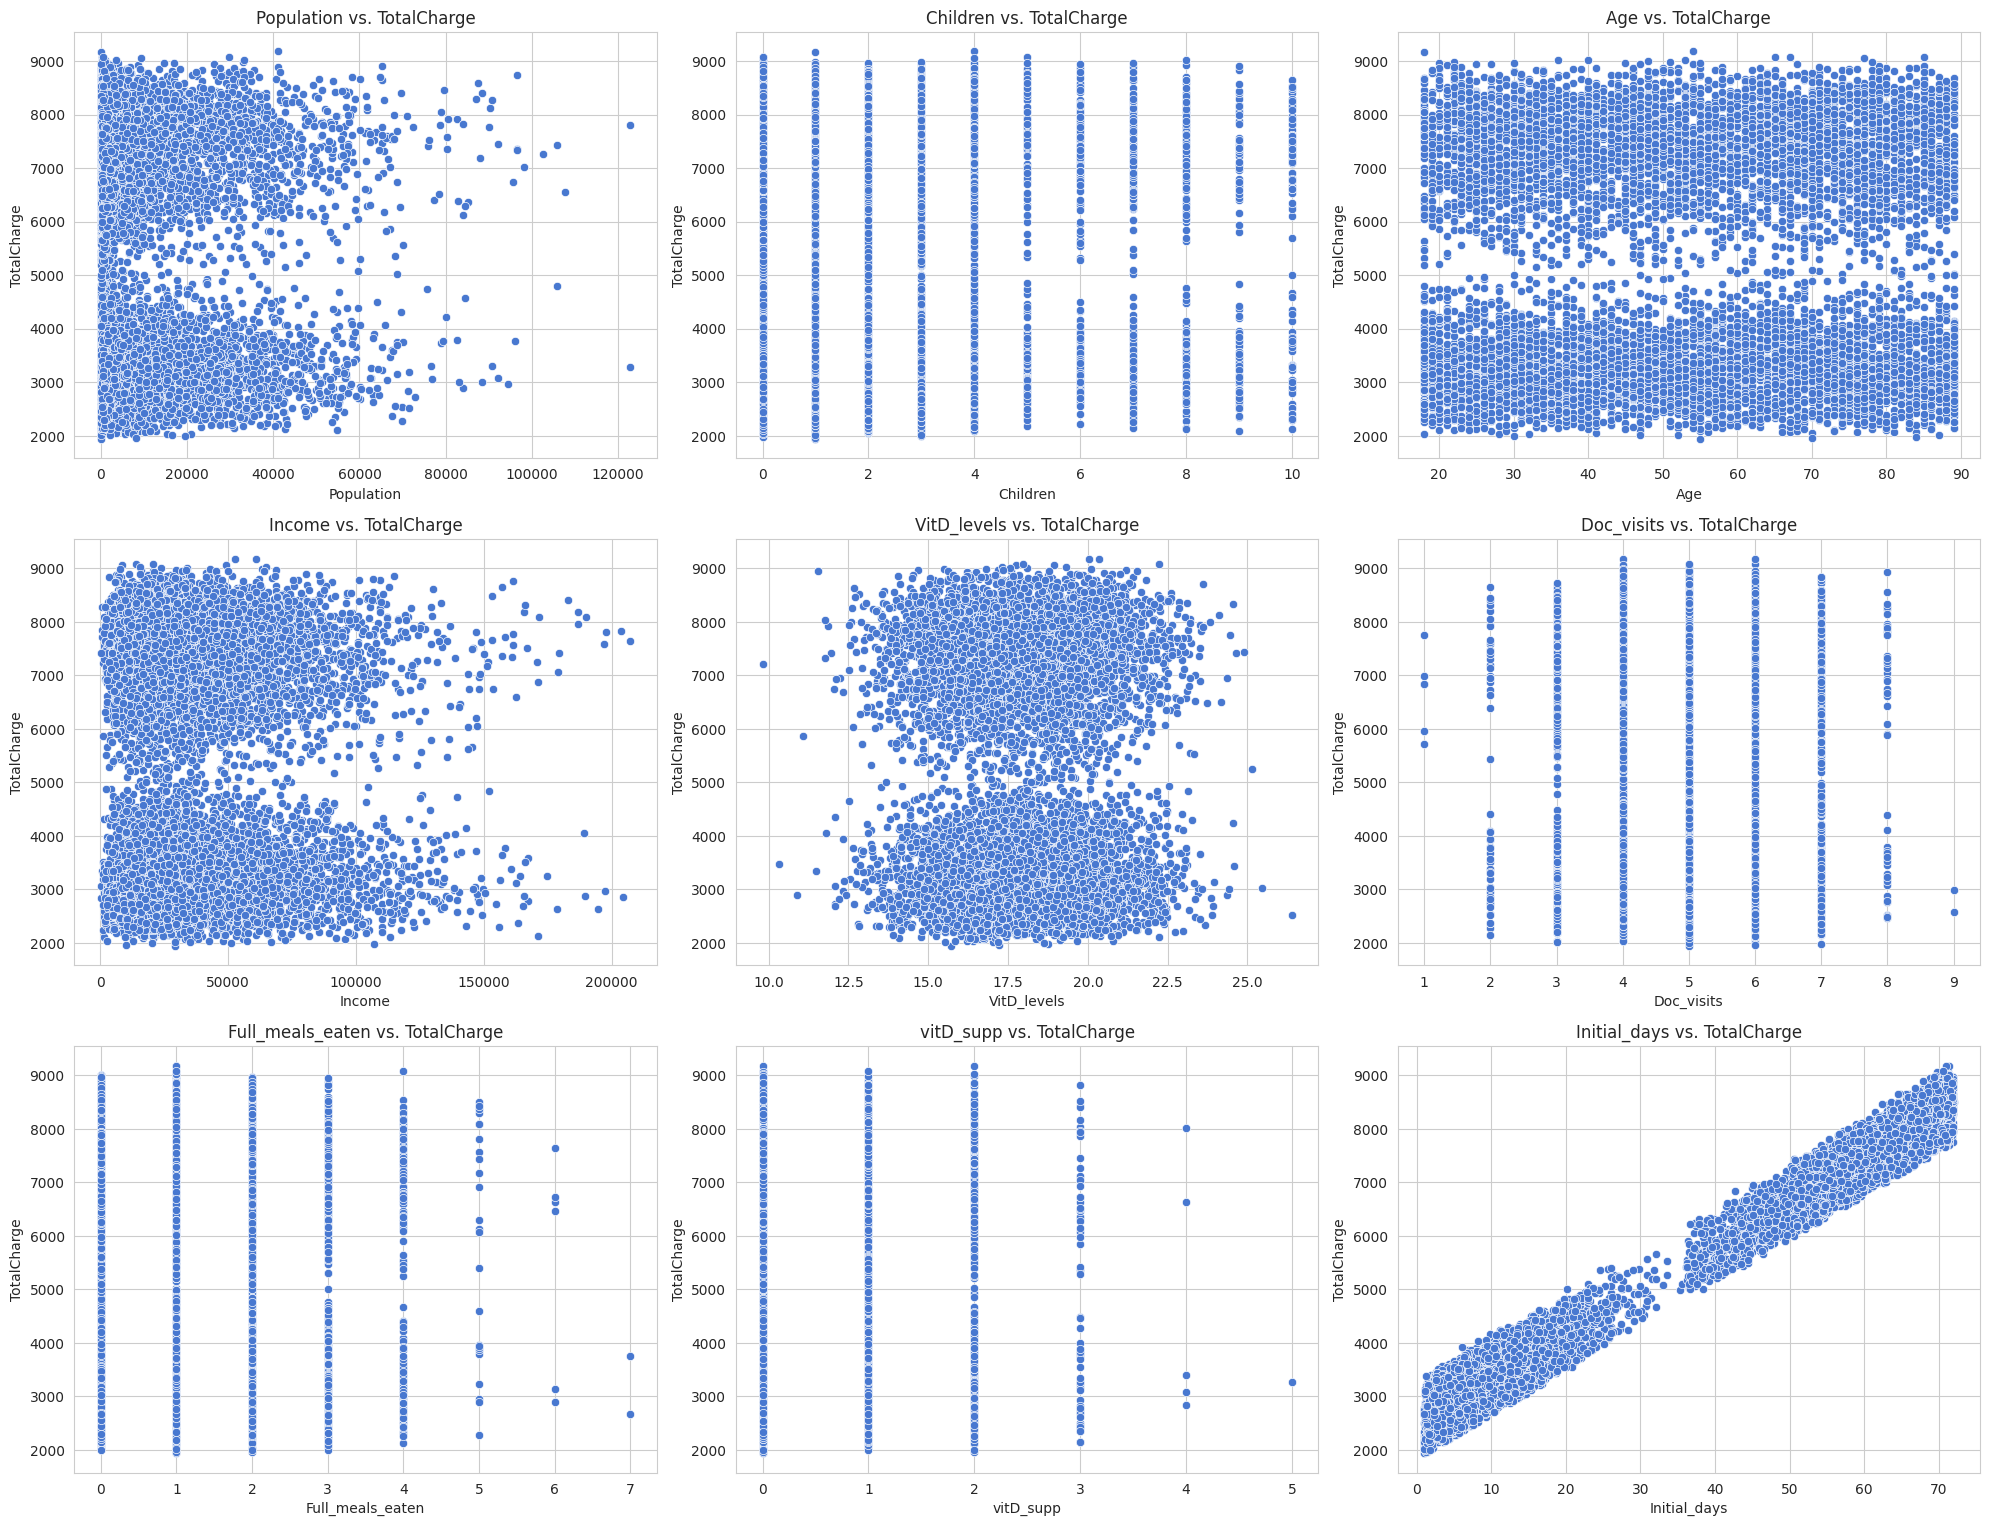

In [ ]:
# List of numerical independent variables (excluding the dependent variable 'TotalCharge')
numerical_independent_vars = medical_data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns='TotalCharge').columns

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Plotting scatter plots for each numerical independent variable vs. TotalCharge
for i, var in enumerate(numerical_independent_vars, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=medical_data_cleaned[var], y=medical_data_cleaned['TotalCharge'])
    plt.title(f'{var} vs. TotalCharge')
    plt.tight_layout()

plt.show()



### 4. Data Transformation Goals and Steps
- Describe the aims of data transformation and the actions taken, accompanied by annotated code.

In [ ]:
# One-hot encoding the categorical variables
medical_data_encoded = pd.get_dummies(medical_data_cleaned, drop_first=True)  # drop_first=True to avoid the dummy variable trap

# Display the first few rows of the encoded dataset
medical_data_encoded.head()


,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,...,1,0,1,1,1,0,1,0,0,0
1,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,...,0,0,0,0,0,1,0,0,1,0
2,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,...,1,0,0,0,0,0,0,0,0,0
3,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,...,0,0,0,0,0,1,1,0,0,0
4,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Initialize the standard scaler
scaler = StandardScaler()

# Scaling the numerical variables
medical_data_encoded[numerical_independent_vars] = scaler.fit_transform(medical_data_encoded[numerical_independent_vars])

# Display the first few rows of the scaled dataset
medical_data_encoded.head()


,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,3726.702860,...,1,0,1,1,1,0,1,0,0,0
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,4193.190458,...,0,0,0,0,0,1,0,0,1,0
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,2434.234222,...,1,0,0,0,0,0,0,0,0,0
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,2127.830423,...,0,0,0,0,0,1,1,0,0,0
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,2113.073274,...,0,1,0,0,1,0,0,1,0,0


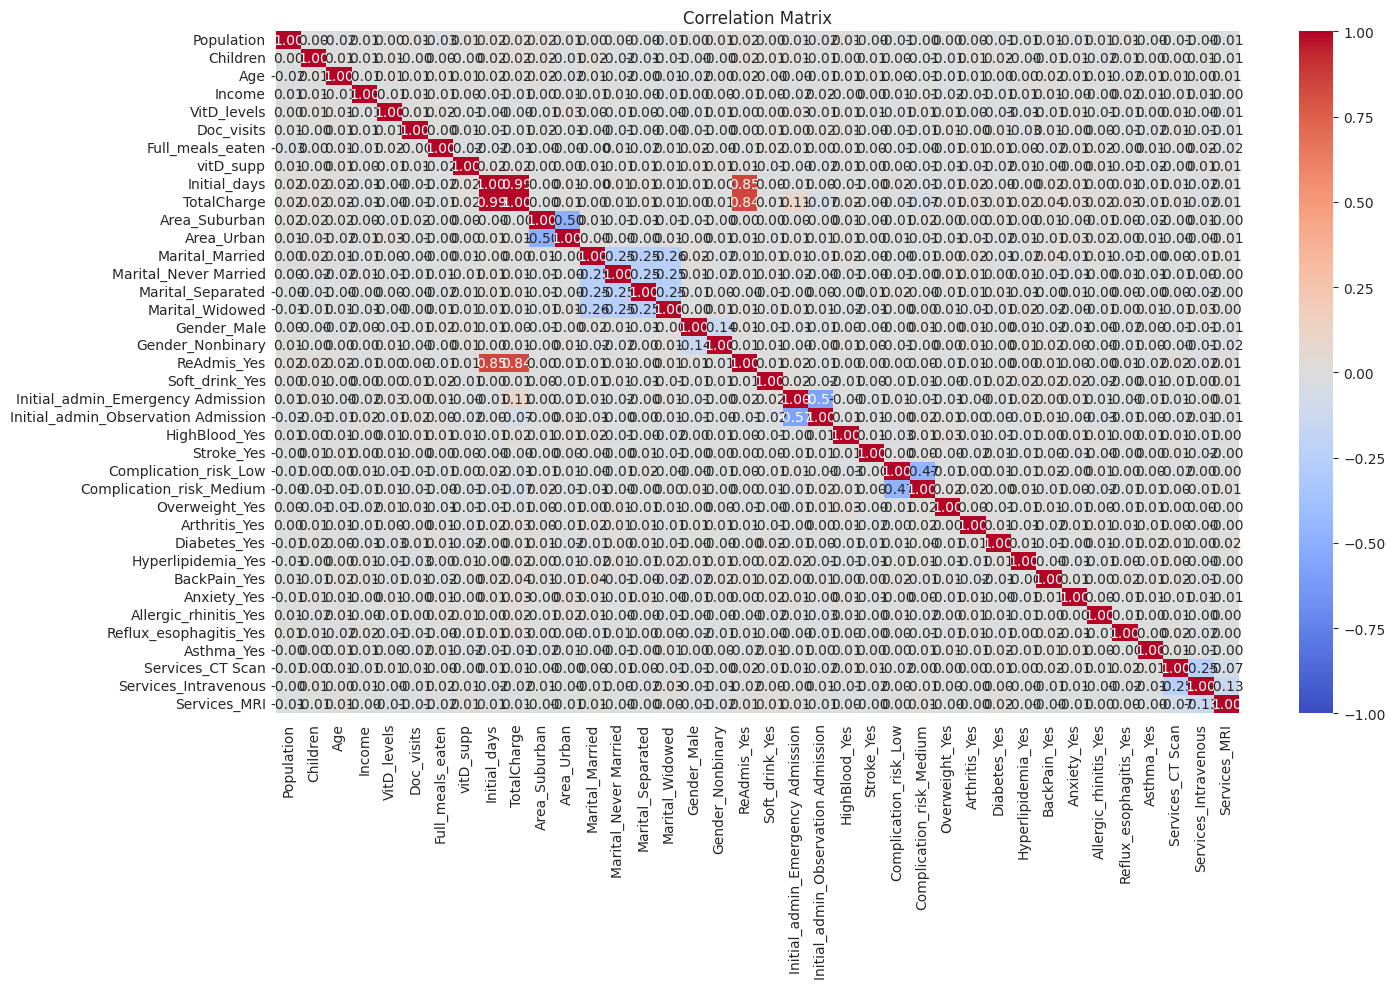

In [ ]:
# Compute the correlation matrix
correlation_matrix = medical_data_encoded.corr()

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")

# Adjust layout for better visualization
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

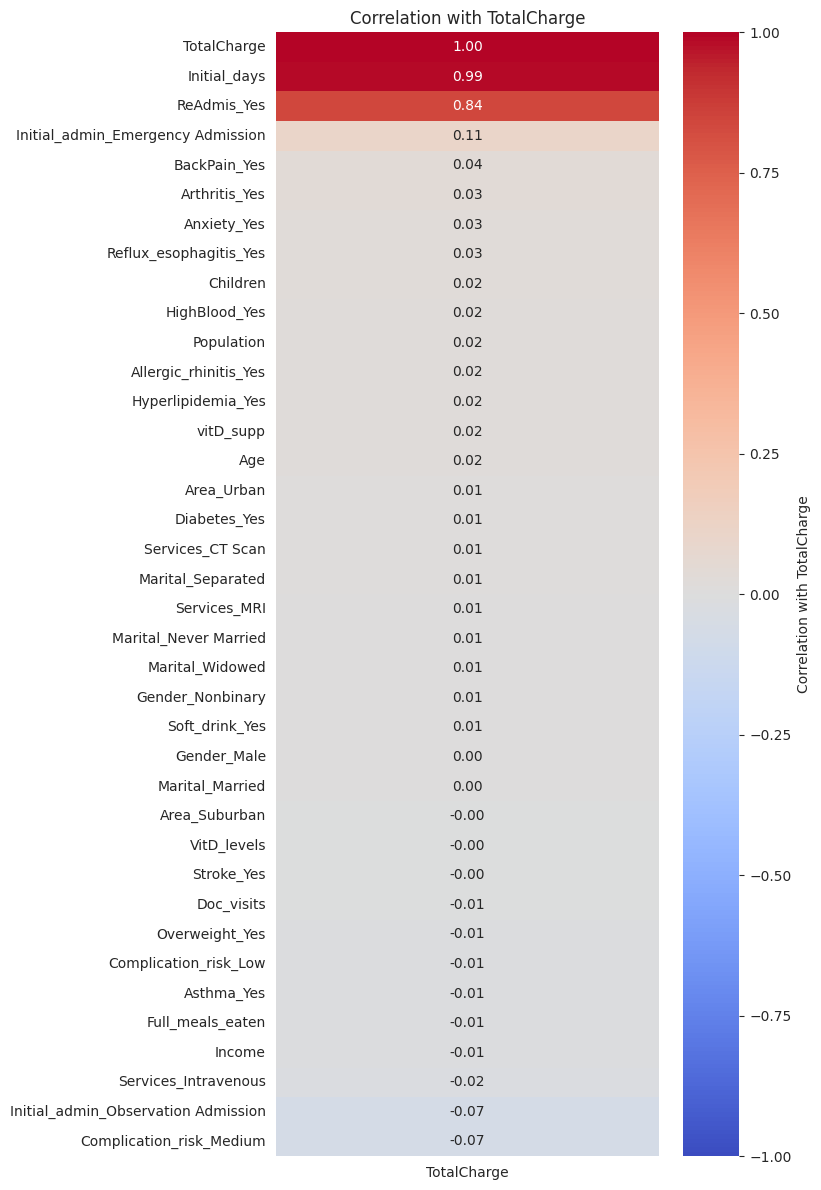

In [ ]:
# Extract correlations of all features with 'TotalCharge'
total_charge_correlations = correlation_matrix['TotalCharge'].sort_values(ascending=False)

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Set up the matplotlib figure
plt.figure(figsize=(8, 12))

# Generate a focused heatmap
sns.heatmap(total_charge_correlations.to_frame(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation with TotalCharge'})

# Adjust layout for better visualization
plt.title("Correlation with TotalCharge")
plt.tight_layout()
plt.show()


### 5. Prepared Data Set
- Supply the cleaned and prepared dataset in CSV format.

In [ ]:
# Save the DataFrame as a CSV file
medical_data_cleaned.to_csv('medical_data_cleaned.csv', index=False)



---


# Part IV: Model Comparison and Analysis

## D. Linear Regression Model Comparison

### 1. Initial Multiple Linear Regression Model
- Construct the initial model using all identified independent variables from Part C2.

### 2. Feature Selection or Model Evaluation Justification
- Explain and justify the approach chosen to refine the initial model, ensuring it aligns with the research question.

### 3. Reduced Linear Regression Model
- Present a concise linear regression model following the procedure from Part D2. Include a snapshot of the model's output.

## E. Reduced Linear Regression Model Analysis

### 1. Data Analysis Process
- Compare the initial and reduced linear regression models, emphasizing a model evaluation metric.

### 2. Analysis Output and Calculations
- Showcase the output and calculations for the reduced model, including a residual plot and the model’s residual standard error.

### 3. Code for Linear Regression Models
- Provide a fault-free, executable copy of the code used in Python or R.

---

# Part V: Data Summary and Implications



## F. Findings and Assumptions

### 1. Analysis Results
- Discuss the findings of the data analysis, touching on the reduced model's regression equation, coefficient interpretations, statistical and practical significances, and any limitations.

### 2. Recommendations
- Propose a course of action based on the analysis results

# Part VI: Demonstration

## G. Panopto Video Recording

 Create and provide a Panopto video recording. The video should:
  - Identify the programming environment's version.
  - Compare the initial and reduced linear regression models.
  - Interpret the coefficients of the refined model.